# An Introduction to VSAs

> Introduction to Vector-Symbolic Architectures.

In [ ]:
# |default_exp vsas

In [ ]:
# |hide
# |export
import typing

import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
from numpy.fft import fft, ifft


# What's a VSA

In this project we are going to be using Vector-Symbolic Architectures (VSAs),
or, Hyperdimensional Computing (HDC) to encode the symbolic syntax of a 
programming language in high-dimensional vector space. But, what is a VSA?
A VSA first provides a method for mapping symbols to high-dimensional vector.
Suppose that we have a language
$\mathcal{L}$ which has three atomic elements: $\texttt{banana}$, 
$\texttt{strawberry}$, and $\texttt{apple}$. 
The language might have some further ways for composing these representations,
and we will investigate how to represent these later, but for right now 
we will focus only on the atomic elements of the language.

The first step for doing VSA computation is to create a mapping $f$ which maps
from the language $\mathcal{L}$ to the high-dimensional vector space $V^D$.
For simplicity, we will be considering only the vector space $\mathbb{R}^D$,
but there are other VSAs which use different vector spaces. For atomic elements,
the mapping $f$ takes symbols in $\mathcal{L}$ to rows to the $N$ rows
(one for each atomic element) of $D$-dimension in the matrix $X$ called the
*codebook*:
$$
X = [x_1, x_2, \dots, x_N],
\tag{1}
$$
and for some atomic $s \in \mathcal{L}$, $f(s) = x_i$.

> We are being very informal about the definition of the syntax
> but later on we will be more formal by providing an actual inductive definition.

Now that we have high-dimensional representations of each of the symbols, how
can we compose them? First, let us extend $\mathcal{L}$ by adding the operator
$(\cdot, \cdot)$, which creates a "tuple" of elements in $\mathcal{L}$.
For example, the tuple of $\texttt{banana}$ and $\texttt{apple}$ is:
$$
t = ( \texttt{banana},~\texttt{apple}).
\tag{2}
$$

Intuitively, $t \neq \text{apple} \neq \text{banana}$, even though $t$ is 
composed of the atomic elements $\texttt{apple}$ and $\texttt{banana}$.
Therefore, we need some function $d$ defined over $X$ such that for $x_i, x_j$,
$$
d (x_i, x_j) = \begin{cases}
    &1,~\text{if}~f^{-1}(x_i) = f^{-1}(x_j), \\
    &0,~\text{otherwise}.
\end{cases}
\tag{3}
$$
Given that we are in $\mathbb{R}^D$, define 
$d(x_i, x_j) = \frac{x_i \cdot x_j}{\|x_i\|\|x_j\|}$, or the *cosine similarity*.
This immediately gives us a function that is $1$ iff $x_i$ and $x_j$ are identical,
and interpolates to $0$ as the vectors become more "dissimilar". 

Given that $D$ is high-dimensional, the "blessing of dimensionality" means
that each $x_i$ and $x_j$, $i \neq j$ are "pseudo-orthogonal", meaning,
it is more likely than not that they are dissimilar up to some constant $\vartheta$:
$$
d(x_i, x_j) = 0 + \vartheta.
\tag{4}
$$
In order to encode the tuple function, we have to create a new representation
*out* of the component elements which is dissimilar to the component elements.
We can achieve this by an operation called *bind*, where the *binding* 
of elements $x_i$ and $x_j$, denoted by $x_i \otimes x_j$, is such that:
$$
\begin{align*}
d(x_i \otimes x_j, x_i) &= 0 + \vartheta, \\
d(x_i \otimes x_j, x_j) &= 0 + \vartheta.
\end{align*}
\tag{5}
$$
Furthermore, *bind* must be invertible, where we have:
$$
\begin{align*}
(x_i \otimes x_j) \otimes^{-1} x_i &= x_j + \kappa, \\
(x_i \otimes x_j) \otimes^{-1} x_j &= x_i + \kappa,
\end{align*}
\tag{6}
$$
with $\kappa$ being a noise term. This invertability is gives us the ability
to extract component elements of the tuple.

With binding defined, we can encode $t$ from (2):
$$
\begin{align*}
f((\texttt{banana},~\texttt{apple})) &= f(\texttt{banana}) \otimes f(\texttt{apple}), \\
&= x_i \otimes x_j.
\end{align*}
\tag{7}
$$

For the final key component, let's add another operator $(\cdot \lor \cdot)$,
called *disjunction*. We can read this as "either ..., or ..." of other
elements in $\mathcal{L}$. While tuples like $t$ are completely dissimlar
to their component elements, disjunctions can either be one of their
elements or the other. For the sake of this model, we'll say that we
want the disjunction of element $s_1 \in \mathcal{L}$ and element $s_2 \in
\mathcal{L}$ to be similar to components. In high-dimensional vector space,
this can be encoded as *superposition*, where for two vectors $x_i$ and $x_j$,
the *superposition* of $x_i$ and $x_j$, denoted $x_i \oplus x_j$ is such that:
$$
\begin{align*}
d((x_i \otimes x_i), x_i) &= 1 - \vartheta , \\
d((x_i \otimes x_j), x_j) &= 1 - \vartheta.
\end{align*}
\tag{8}
$$
With this defined, we can define the mapping $f$ over disjunctions as:
$$
\begin{align*}
f((\texttt{banana},~\texttt{apple})) &= f(\texttt{banana}) \oplus f(\texttt{apple}) \\
&= x_i \oplus x_j.
\end{align*}
\tag{9}
$$
These three functions are the core of VSAs, and give us incredible expressive
capacity.

## Summary

VSAs are a model of symbolic structures which are able to express compositional
relationships between symbols as functions defined over high-dimensional vector
space. The key three operations used to encode these symbolic relations are:

1. **Similarity**: similarity between two high-dimensional vectors in Eq'n. (3), which
is close to $1$ when they are "the same" and close to $0$ when they aren't.

2. **Binding**: binding composes elements into a new, distinct symbol from their
component parts. Binding satisfies the properties in Eq'n. (5).

3. **Superposition**: also called *bundling* (as a dual with binding), that makes
a new high-dimensional vector which is similar to the component elements,
satisfying the properties in Eq'n. (8).

For the language $\mathcal{L}$ defined as the minimal set which satisfies
the following properties:

1. Atomic elements $\mathcal{A} = \{\texttt{apple},~\texttt{banana},~\texttt{strawberry}\}$ 
are in the set.

2. If $s \in \mathcal{L}$ and $z \in \mathcal{L}$, then the *tuple* $(s, z)$
is also in $\mathcal{L}$.

3. If $s \in \mathcal{L}$ and $z \in \mathcal{L}$, then the *disjunction*
$(s \lor z)$ is in $\mathcal{L}$.

4. Anything not satisfying the above requirements is not in $\mathcal{L}$.

We can define the encoding function $f(\mathcal{L}) = \mathbb{R}^D$ inductively:

1. If $x$ is in $\mathcal{A}$, then $f(x) = x_i$, for $D$-dimensional row
vector in the codebook $X$.

2. If $\phi \in \mathcal{L}$ and $\psi \in \mathcal{L}$, then 
$$
f((\phi, \psi)) = f(\phi) \otimes f(\psi).
$$

3. If $\phi \in \mathcal{L}$ and $\psi \in \mathcal{L}$, then,
$$
f ((\phi \lor \psi)) = f(\phi) \oplus f(\psi).
$$

# Holographic Reduced Representations.

Holographic Reduced Representations (HRRs) will our VSA of choice for this
project [(Plate, 1995)](https://pages.ucsd.edu/~msereno/170/readings/06-Holographic.pdf).

HRRs use high-dimensional vectors in real space. For the binding operator,
we use circular convolution. Because circular convolution is component-wise
multiplication in Fourier space, we implement it using the simple:
$$
x \otimes y = \mathfrak{R}\left\{
    \mathcal{F^{-1}}\left[ 
        \mathcal{F}(x) \mathcal{F}(y)
        \right]
\right\},
\tag{10}
$$
with $\mathfrak{R}$ denoting the *real* components of the vector, discarding the
complex components; $\mathcal{F}$ the Fourier transform, and $\mathcal{F}^{-1}$
the *inverse* Fourier transform.

For the similarity measure we use cosine similarity, and for superposition
we use component-wise addition.

# Coding it up!

The definition above was a little bit abstract, but it should become clearer
once we have a coding implementation in our hands. We're going to use 
`numpy` as our numerical processing library, though we could do any other
(if we like).

In [ ]:
class HRR(np.ndarray):
    """Thin wrapper around `np.ndarray` for Holographic Reduced Representations
    (HRRs).
    """

    # Incantation needed for subclassing `np.ndarray`.
    def __new__(cls, input_array) -> object:
        obj = np.asarray(input_array).view(cls)
        return obj

    # Same as above
    def __array_finalize__(self, obj: object) -> None:
        if obj is None:
            return

    # The binding operation.
    def bind(self, other: typing.Union[np.ndarray, "HRR"]) -> "HRR":
        """Perform circular convolution.

        Args:
            other (np.ndarray): Second argument.

        Returns:
            Circular convolution of the vector and the other.
        """
        return ifft(fft(self) * fft(other)).real.view(HRR)

    def inverse(self) -> "HRR":
        """Invert the vector for unbinding."""
        return self[np.r_[0, self.size - 1 : 0 : -1]].view(HRR)

    def cosine_similarity(self, other: typing.Union[np.ndarray, "HRR"]) -> float:
        return float((self.dot(other)) / (np.linalg.norm(self) * np.linalg.norm(other)))

We also need a way of generating new vectors. This function helps us create
arbitrary new symbols for each atomic symbol in the language $\mathcal{L}$. To
do this, we sample elements from the normal distribution:
$$
\mathcal{N}\left(\mu=1, \sigma = \frac{1}{d}\right),
$$
and then normalize them to unit magnitude.

In [ ]:
def random(
    num_vectors: int,
    dim: int,
    dtype: npt.DTypeLike = float,
    rng=np.random.default_rng(),
) -> "HRR":
    r"""Create matrix of `n` `d`-dimensional HRR vectors, sampled from the normal
    distribution,
    $$
    \mathcal{N}(\mu=1, \sigma^2 = \frac{1}{d}),
    $$

    Args:
        num_vectors int: The number of vector symbols you wish to generate.
        dim int: The dimension of the vector symbols.
        dtype npt.DTypeLike: The `dtype` of the vector generated. Default: ``float``.
        rng: Random number generator.

    Returns:
        A ``(num_vectors, dim)`` matrix of random vector symbols.
    """
    sd = 1.0 / np.sqrt(dim)
    vs = rng.normal(scale=sd, size=(num_vectors, dim)).astype(dtype)
    norms = np.linalg.vector_norm(vs, axis=1, keepdims=True)
    vs /= norms
    return HRR.__new__(cls=HRR, input_array=vs)

We can inspect some randomly generated vectors.

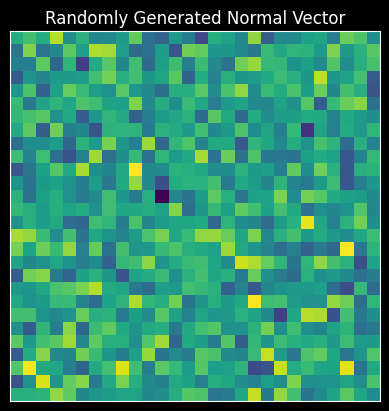

In [ ]:
X = random(2, 28 * 28)


def display_im(x, title=None):
    plt.imshow(x.reshape(28, 28))
    if title:
        plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()


display_im(X[0], title="Randomly Generated Normal Vector")

We can also test our important measures: similarity, binding, and superposition.

In [ ]:
x_0 = X[0]
x_1 = X[1]

print(f"Cosine similarity between x_0 and x_1: {x_0.cosine_similarity(x_1)}")

t = x_0.bind(x_1)
print(f"Cosine similarity between x_0 and (x_0 * x_1): {x_0.cosine_similarity(t)}")

unbound = t.bind(x_1.inverse())
print(f"Cosine similarity between (t / x_1) and x_0: {unbound.cosine_similarity(x_0)}")

spose = x_0 + x_1
print(f"Cosine similarity between x_0 and (x_0 + x_1): {spose.cosine_similarity(x_0)}")

Cosine similarity between x_0 and x_1: -0.004668307104146607
Cosine similarity between x_0 and (x_0 * x_1): 0.1232672204723025
Cosine similarity between (t / x_1) and x_0: 0.6961395290534296
Cosine similarity between x_0 and (x_0 + x_1): 0.7054543546168858


# The Abstract Syntax of $\mathcal{L}$.

Now that we have the basics of VSAs. In fashion that will become more typical,
we will define the *abstract syntax* of our language $\mathcal{L}$. Recall,
$\mathcal{L}$ has three basic parts: the atomic elements $\mathcal{A}$,
tuples, and disjunctions.

We will define a representation for each of these, and then define
an *encoding* function $f$ that maps these representations onto HRRs.

In [ ]:
from dataclasses import dataclass
from abc import ABCMeta


@dataclass
class L(metaclass=ABCMeta):
    """Abstract base class of our language L."""

    pass


@dataclass
class Atomic(L):
    """Abstract base class of atomic elements in the language."""

    name: str


@dataclass
class Tuple(L):
    """Tuples in L."""

    lhs: L
    rhs: L


@dataclass
class Disjunction(L):
    """Disjunctions in L."""

    lhs: L
    rhs: L


def create_codebook(atomic_symbols: list[str], dim: int) -> HRR:
    """Create a codebook of atomic symbols.

    Args:
        atomic_symbols list[str]: The list of atomic symbols in the language.
        dim int: The dimension of the vector symbols corresponding to the atomic symbols.

    Returns:
        A ``(len(atomic_symbols), dim)`` matrix codebook.
    """
    N, D = len(atomic_symbols), dim
    return random(N, D)


def encode(expression: L, atomic_symbols: list[str], codebook: HRR) -> HRR:
    r"""Encode an expression in $\mathcal{L}$ to HRR.

    Args:
        expression L: The expression to encode.
        atomic_symbols list[str]: The list of atomic symbols.
        codebook HRR: ``(len(atomic_symbols), D)`` matrix codebook.

    Returns:
        The encoded form of the symbol.
    """

    if not isinstance(expression, L):
        raise TypeError("Expected argument to subclass `L`", expression)

    # Base case
    if isinstance(expression, Atomic):
        name = expression.name
        name_idx = atomic_symbols.index(name)
        return codebook[name_idx]
    # Inductive cases
    elif isinstance(expression, Tuple):
        lhs = expression.lhs
        rhs = expression.rhs
        return encode(lhs, atomic_symbols, codebook).bind(
            encode(rhs, atomic_symbols, codebook)
        )
    elif isinstance(expression, Disjunction):
        lhs = expression.lhs
        rhs = expression.rhs
        return encode(lhs, atomic_symbols, codebook) + encode(
            rhs, atomic_symbols, codebook
        )

Let's test out our definitions to see if they maintain the same properties
that we expect: namely,

1. Atomic symbols should be self-similar, but very dissimlar to other atomic
symbols.

2. We should be able to retrieve the component parts of tuples.

3. And, disjunctions should be similar to both component parts.

In [ ]:
dim = 400

apple = Atomic("apple")
strawberry = Atomic("strawberry")
banana = Atomic("banana")

atomic_names = ["apple", "strawberry", "banana"]
X = create_codebook(atomic_names, dim)
print(f"{X.shape = }")

enc_apple = encode(apple, atomic_names, X)
enc_straw = encode(strawberry, atomic_names, X)
enc_banana = encode(banana, atomic_names, X)

print(f"{enc_apple.cosine_similarity(enc_apple) = }")
print(f"{enc_apple.cosine_similarity(enc_straw) = }")

X.shape = (3, 400)
enc_apple.cosine_similarity(enc_apple) = 1.0000000000000002
enc_apple.cosine_similarity(enc_straw) = 0.00039153428747147444


In [ ]:
t = Tuple(banana, apple)
enc_t = encode(t, atomic_names, X)

print(f"Tuple similarity with encoded_apple: {enc_t.cosine_similarity(enc_apple):.2f}")
print(
    f"Tuple similarity with encoded_banana: {enc_t.cosine_similarity(enc_banana):.2f}"
)

Tuple similarity with encoded_apple: 0.09
Tuple similarity with encoded_banana: 0.03


In [ ]:
d = Disjunction(banana, apple)
enc_d = encode(d, atomic_names, X)

print(
    f"Disjunction similarity with encoded_apple: {enc_d.cosine_similarity(enc_apple):.2f}"
)
print(
    f"Disjunction similarity with encoded_banana: {enc_d.cosine_similarity(enc_banana):.2f}"
)

Disjunction similarity with encoded_apple: 0.72
Disjunction similarity with encoded_banana: 0.72


# Summary

In this section we introduced Vector-Symbolic Architectures or Hyperdimensional
Computing: what kinds of operations they use, and the motivation behind them.
We also discussed some basics about representing the abstract syntax of a 
language. In the next section, we will be investigating the more general question:
given language $\mathcal{L}$, how do we define a one-to-one mapping from $\mathcal{L}$
to $\mathbb{R}^D$?

In [ ]:
# | hide
# | export
class HRR(np.ndarray):
    """Thin wrapper around `np.ndarray` for Holographic Reduced Representations
    (HRRs).
    """

    # Incantation needed for subclassing `np.ndarray`.
    def __new__(cls, input_array) -> "HRR":
        obj = np.asarray(input_array).view(cls)
        return obj

    # Same as above
    def __array_finalize__(self, obj: object) -> None:
        if obj is None:
            return

    # The binding operation.
    def bind(self, other: typing.Union[np.ndarray, "HRR"]) -> "HRR":
        """Perform circular convolution.

        Args:
            other (np.ndarray): Second argument.

        Returns:
            Circular convolution of the vector and the other.
        """
        return ifft(fft(self) * fft(other)).real.view(HRR)

    def inverse(self) -> "HRR":
        """Invert the vector for unbinding."""
        return self[np.r_[0, self.size - 1 : 0 : -1]].view(HRR)

    def cosine_similarity(self, other: typing.Union[np.ndarray, "HRR"]) -> float:
        return float((self.dot(other)) / (np.linalg.norm(self) * np.linalg.norm(other)))


# | export
def random(
    num_vectors: int,
    dim: int,
    dtype: npt.DTypeLike = float,
    rng=np.random.default_rng(),
) -> "HRR":
    r"""Create matrix of `n` `d`-dimensional HRR vectors, sampled from the normal
    distribution,
    $$
    \mathcal{N}(\mu=1, \sigma^2 = \frac{1}{d}),
    $$

    Args:
        num_vectors int: The number of vector symbols you wish to generate.
        dim int: The dimension of the vector symbols.
        dtype npt.DTypeLike: The `dtype` of the vector generated. Default: ``float``.
        rng: Random number gene1ator.

    Returns:
        A ``(num_vectors, dim)`` matrix of random vector symbols.
    """
    sd = 1.0 / np.sqrt(dim)
    vs = rng.normal(scale=sd, size=(num_vectors, dim)).astype(dtype)
    norms = np.linalg.vector_norm(vs, axis=1, keepdims=True)
    vs /= norms
    return HRR.__new__(cls=HRR, input_array=vs)

In [ ]:
# | hide
import nbdev

nbdev.nbdev_export()